## <span style="color: #a9af90">1 | </span><span style="color: #586c5c">Libraries</span>

In [1]:
pip install yahoo-fin

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=575996b60adca811797e1188d78d0304c6ca83aa40c216e1e34584d6ac5a90cd
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: websockets
    Found existing installation: websockets 14.1
    Uninstalling websockets-14.1:
      Successfully uninstalled websockets-14.1
  Attempting uninstall: u

In [2]:
pip install --upgrade yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


### <span style="color: #a9af90;">1.1 | </span><span style="color: #85937a">Strugling a lot to get the Stock Info</span>

In [4]:
# The following code didn't work correctly and I get error:


# live_price = si.get_live_price('GOOG')
# print('The current price is: ', live_price)

# live_price_df = pd.DataFrame({'Timestamp': [datetime.now()], 'Price': [live_price]})
# live_price_df.to_csv('live_price.csv', index=False)

# start_date = '2016-01-01'
# end_date = datetime.today().strftime('%Y-%m-%d')

# historical_data = si.get_data('GOOG', start_date=start_date, end_date=end_date)

# historical_data.to_csv('Google.csv')

# print(historical_data)

In [5]:
start_date = '2018-01-01'
end_date = '2025-01-01'

google_stock = yf.Ticker("GOOG")
historical_data = google_stock.history(start=start_date, end=end_date)

historical_data.to_csv('google_stock_data.csv')

print(historical_data)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [6]:
import requests

try:
    # This internally calls get_data which fetches data from Yahoo Finance.
    google_price = si.get_live_price("GOOG")
    print("Google's stock price:", google_price)
except Exception as e:
    # If an error occurs, print the raw response text for debugging
    resp = requests.get("https://query1.finance.yahoo.com/v8/finance/chart/GOOG", 
                        params={"period1": 0, "period2": int(pd.Timestamp("now").timestamp()), "interval": "1d"})
    print("Raw response:", resp.text)
    print("Error:", e)

Raw response: Edge: Too Many Requests
Error: Expecting value: line 1 column 1 (char 0)


In [7]:
import yfinance as yf

goog = yf.Ticker("GOOG")

historical_data = goog.history(start="2018-01-01", end="2025-01-01")

print(historical_data)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [8]:
pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
from yahooquery import Ticker
import warnings
warnings.simplefilter("ignore", FutureWarning)

goog = Ticker("GOOG")

data = goog.history(start="2018-01-01", end="2025-01-01")
df = pd.DataFrame(data)
df.to_csv("Google_Stock_Price.csv")
df

open        high         low       close    volume  \
symbol date                                                                   
GOOG   2018-01-02   52.417000   53.347000   52.261501   53.250000  24752000   
       2018-01-03   53.215500   54.314499   53.160500   54.124001  28604000   
       2018-01-04   54.400002   54.678501   54.200100   54.320000  20092000   
       2018-01-05   54.700001   55.212502   54.599998   55.111500  25582000   
       2018-01-08   55.111500   55.563499   55.081001   55.347000  20952000   
...                       ...         ...         ...         ...       ...   
       2024-12-24  196.169998  197.669998  195.197998  197.570007   6809800   
       2024-12-26  196.740005  198.160004  195.869995  197.100006   7907900   
       2024-12-27  196.470001  196.800003  191.972000  194.039993  14693000   
       2024-12-30  190.865005  193.779999  190.360001  192.690002  12209500   
       2024-12-31  192.445007  193.250000  189.580002  190.440002  14355200   

                     adjclose  dividends  splits  
symbol date                                       
GOOG   2018-01-02   53.059353        0.0     0.0  
       2018-01-03   53.930225        0.0     0.0  
       2018-01-04   54.125523        0.0     0.0  
       2018-01-05   54.914188        0.0     0.0  
       2018-01-08   55.148846        0.0     0.0  
...                       ...        ...     ...  
       2024-12-24  197.570007        0.0     0.0  
       2024-12-26  197.100006        0.0     0.0  
       2024-12-27  194.039993        0.0     0.0  
       2024-12-30  192.690002        0.0     0.0  
       2024-12-31  190.440002        0.0     0.0  

[1761 rows x 8 columns]

### <span style="color: #a9af90;">1.2 | </span><span style="color: #85937a">Creating Dataset for Prediction</span>

In [10]:
goog = Ticker("GOOG")

future_data = goog.history(start="2025-01-02", end="2025-01-17")
future_df = pd.DataFrame(future_data)
future_df.to_csv("Google_Future_Stock_Price.csv")
future_df

open        high         low       close    volume  \
symbol date                                                                   
GOOG   2025-01-02  191.485001  193.199997  188.710007  190.630005  17545200   
       2025-01-03  192.725006  194.500000  191.350006  193.130005  12875000   
       2025-01-06  195.149994  199.559998  195.059998  197.960007  19483300   
       2025-01-07  198.270004  202.139999  195.940002  196.710007  16966800   
       2025-01-08  193.949997  197.639999  193.750000  195.389999  14335300   
       2025-01-10  195.419998  197.619995  191.600006  193.169998  20753800   
       2025-01-13  191.350006  192.490005  188.660004  192.289993  13169100   
       2025-01-14  192.500000  193.270004  189.639999  191.050003  13651200   
       2025-01-15  194.350006  197.800003  193.330002  196.979996  12894900   
       2025-01-16  195.824997  196.979996  194.300003  194.410004  13449600   

                     adjclose  
symbol date                    
GOOG   2025-01-02  190.630005  
       2025-01-03  193.130005  
       2025-01-06  197.960007  
       2025-01-07  196.710007  
       2025-01-08  195.389999  
       2025-01-10  193.169998  
       2025-01-13  192.289993  
       2025-01-14  191.050003  
       2025-01-15  196.979996  
       2025-01-16  194.410004

In [11]:
future_df.reset_index(inplace=True)
future_df.drop('symbol', axis=1, inplace=True)
future_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose'], dtype='object')

## <span style="color: #a9af90">2 | </span><span style="color: #586c5c">Pre processing</span>

In [12]:
# I use this code to bring the "date" column which is now an index into the dataset's column
df.reset_index(inplace=True)

In [13]:
df.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

In [14]:
# Drop the 'symbol' column
df.drop('symbol', axis=1, inplace=True)
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

In [15]:
df.head()

,date,open,high,low,close,volume,adjclose,dividends,splits
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125523,0.0,0.0
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [16]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1761 non-null   datetime64[ns]
 1   open       1761 non-null   float64       
 2   high       1761 non-null   float64       
 3   low        1761 non-null   float64       
 4   close      1761 non-null   float64       
 5   volume     1761 non-null   int64         
 6   adjclose   1761 non-null   float64       
 7   dividends  1761 non-null   float64       
 8   splits     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 123.9 KB


In [18]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dividends    0
splits       0
dtype: int64

No missing values

### <span style="color: #a9af90;">2.1 | </span><span style="color: #85937a">An explanation of why to use "close" column
</span>

### Why Am I Using the 'Close' Column?
You might be wondering, "Why am I focusing only on the 'close' column when we have other interesting features like 'open', 'high', 'low', 'volume', and more?" Good question! Let me break it down.

The 'close' column is commonly used for a few important reasons:

1. `It's the Most Reliable Indicator`<br>
    The closing price is the final price at which the stock was traded during normal market hours. It's considered the most accurate representation of a stock's value for that day since it's not influenced by random intraday fluctuations.

2. `Standard Practice for Prediction Models`<br>
    In time series forecasting and stock price prediction, using the 'close' price is a widely accepted approach. It provides a single, consistent target value for supervised learning, making the prediction task simpler and more interpretable.

3. `Noise Reduction`<br>
    By focusing on the closing price, we're reducing noise caused by sudden spikes or drops during the day. It gives us a cleaner and more stable signal to work with.

4. `Easy Comparison of Predictions`<br>
    When we compare our model’s predictions to real prices, it’s much simpler and more meaningful if we use the 'close' prices as our baseline. After all, it's the price most investors and analysts pay attention to when evaluating stocks.

Now, does this mean other features are useless? Not at all! Using additional columns like 'open', 'high', 'low', and 'volume' can certainly enhance the model’s performance. But for simplicity and clarity, we’ll start with the 'close' price and later experiment with including other features if necessary.

### <span style="color: #a9af90;">2.2 | </span><span style="color: #85937a">Plotting the closing price to visualize the trend</span>

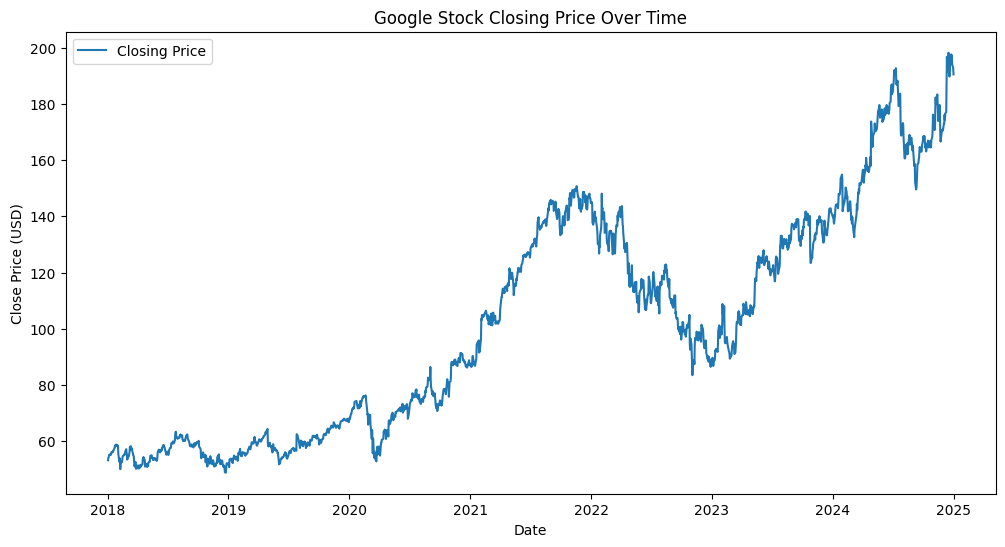

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price')
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

### <span style="color: #a9af90;">2.3 | </span><span style="color: #85937a">Plotting distribution of the closing prices</span>

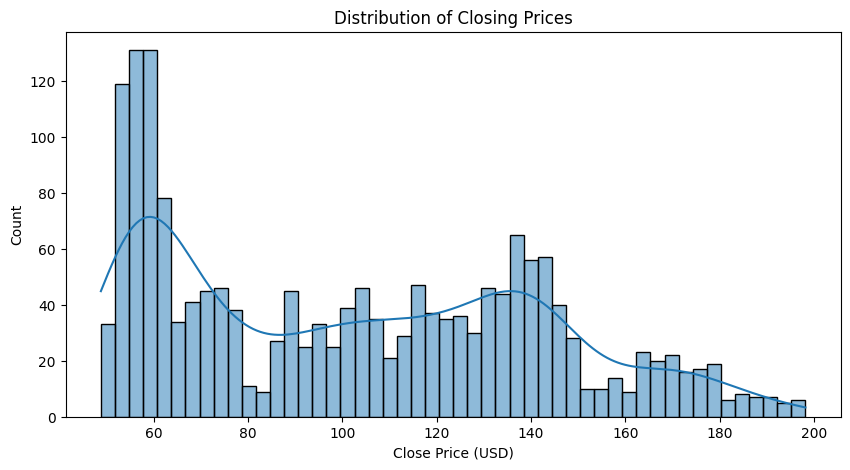

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price (USD)')
plt.show()

### <span style="color: #a9af90;">2.4 | </span><span style="color: #85937a">Normalizing the 'Close' column for LSTM processing</span>

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close']])

In [22]:
print(f'Scaled Data Shape: {scaled_data.shape}')

Scaled Data Shape: (1761, 1)


## <span style="color: #a9af90">3 | </span><span style="color: #586c5c">Creating Sequences for LSTM</span>

In [23]:
look_back = 60

def create_dataset(data, look_back=look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## <span style="color: #a9af90">4 | </span><span style="color: #586c5c">Build and Train Models</span>

### <span style="color: #a9af90;">4.1 | </span><span style="color: #85937a">Simple LSTM Model</span>

In [24]:
simple_model = Sequential()
simple_model.add(LSTM(50, activation='tanh', input_shape=(look_back, 1)))
simple_model.add(Dense(10))
simple_model.add(Dense(1))
simple_model.compile(optimizer='adam', loss='mse')
simple_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,921 (42.66 KB)

 Trainable params: 10,921 (42.66 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
simple_history = simple_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0434 - val_loss: 0.0027
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8302e-04 - val_loss: 7.4122e-04
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5299e-04 - val_loss: 7.8880e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8596e-04 - val_loss: 7.1155e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6565e-04 - val_loss: 7.0071e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5985e-04 - val_loss: 6.9288e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0382e-04 - val_loss: 6.7878e-04
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2839e-04 - val_loss: 6.6977e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2163e-04 - val_loss: 6.7010e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1062e-04 - val_loss: 6.5848e-04
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4647e-04 - val

In [26]:
predicted_simple = simple_model.predict(X_test)
mse_simple = mean_squared_error(y_test, predicted_simple)
print("Simple LSTM Model MSE:", mse_simple)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Simple LSTM Model MSE: 0.0004019452984594761


### <span style="color: #a9af90;">4.2 | </span><span style="color: #85937a">Complex LSTM Model</span>

In [27]:
complex_model = Sequential()
complex_model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(look_back, 1)))
complex_model.add(Dropout(0.2))
complex_model.add(LSTM(50, activation='tanh', return_sequences=False))
complex_model.add(Dropout(0.2))
complex_model.add(Dense(25, activation='relu'))
complex_model.add(Dense(1))
complex_model.compile(optimizer='adam', loss='mse')
complex_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,301 (282.43 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
complex_history = complex_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0399 - val_loss: 0.0026
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6040e-04 - val_loss: 0.0011
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [29]:
predicted_complex = complex_model.predict(X_test)
mse_complex = mean_squared_error(y_test, predicted_complex)
print("Complex LSTM Model MSE:", mse_complex)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Complex LSTM Model MSE: 0.0024641046148280686


## <span style="color: #a9af90">5 | </span><span style="color: #586c5c">Plotting Both Models Results</span>

### <span style="color: #a9af90;">5.1 | </span><span style="color: #85937a">Plot Training and Validation Loss</span>

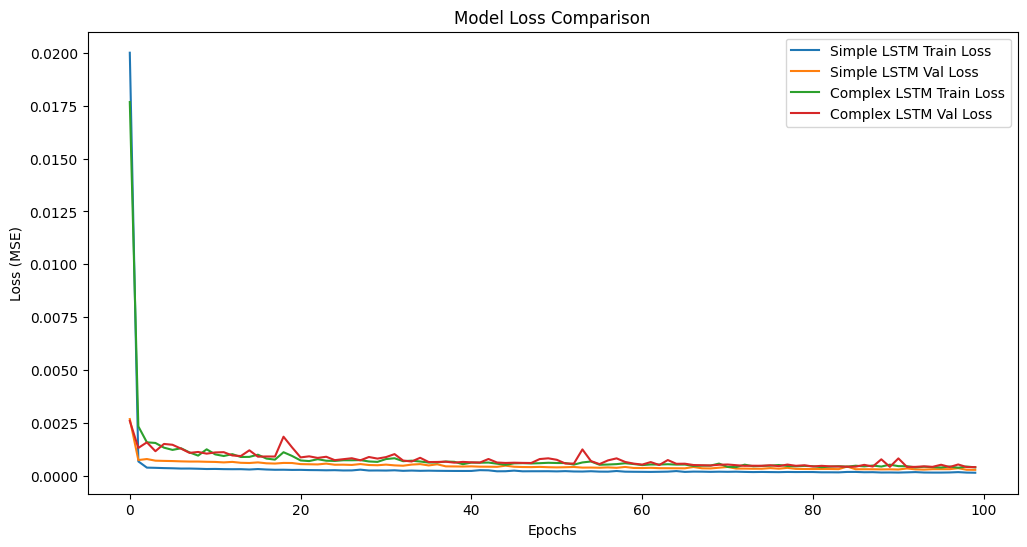

In [30]:
plt.figure(figsize=(12,6))
plt.plot(simple_history.history['loss'], label='Simple LSTM Train Loss')
plt.plot(simple_history.history['val_loss'], label='Simple LSTM Val Loss')
plt.plot(complex_history.history['loss'], label='Complex LSTM Train Loss')
plt.plot(complex_history.history['val_loss'], label='Complex LSTM Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### <span style="color: #a9af90;">5.2 | </span><span style="color: #85937a">Plot predictions vs. actual values for the simple LSTM model</span>

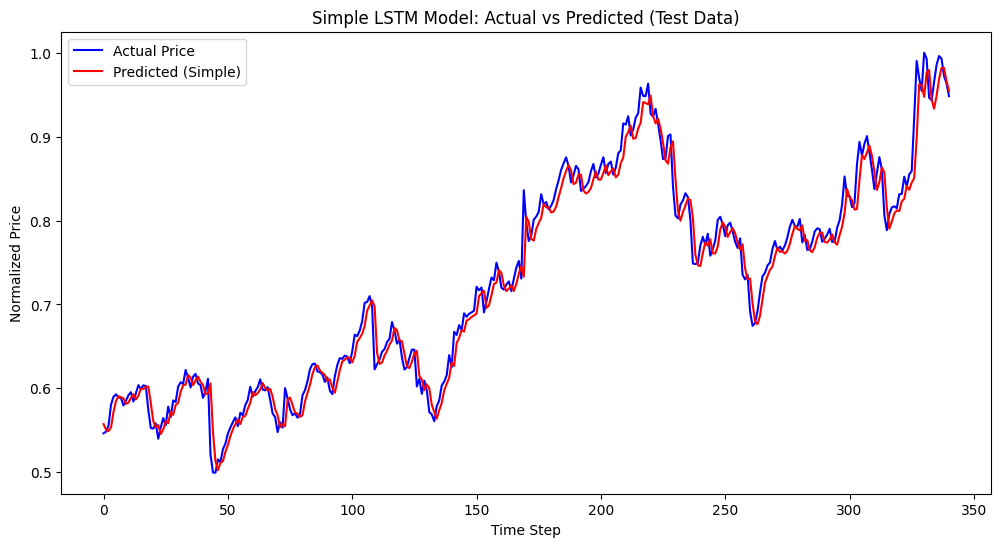

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(predicted_simple, color='red', label='Predicted (Simple)')
plt.title('Simple LSTM Model: Actual vs Predicted (Test Data)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

### <span style="color: #a9af90;">5.3 | </span><span style="color: #85937a">Plot predictions vs. actual values for the complex LSTM model</span>

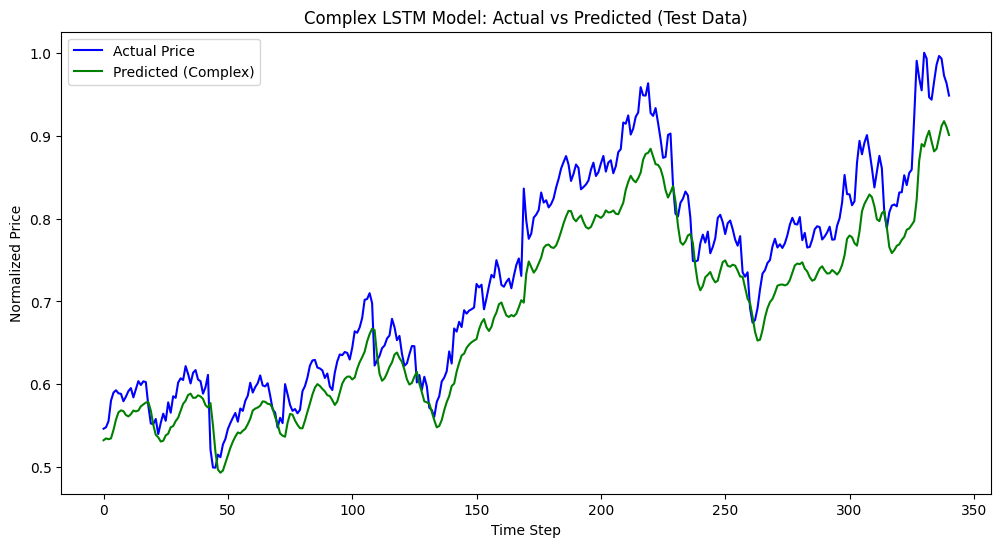

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(predicted_complex, color='green', label='Predicted (Complex)')
plt.title('Complex LSTM Model: Actual vs Predicted (Test Data)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

## <span style="color: #a9af90">6 | </span><span style="color: #586c5c">Forecasting the Next 10 Days</span>

### <span style="color: #a9af90;">6.1 | </span><span style="color: #85937a">Forecasting with the Simple LSTM Model</span>

In [33]:
num_future = 10

last_sequence_simple = scaled_data[-look_back:]
last_sequence_simple = last_sequence_simple.reshape(1, look_back, 1)

predicted_future_simple = []

for i in range(num_future):
    pred = simple_model.predict(last_sequence_simple)
    predicted_future_simple.append(pred[0, 0])
    new_val = pred.reshape(1, 1, 1)
    last_sequence_simple = np.concatenate((last_sequence_simple[:, 1:, :], new_val), axis=1)

predicted_future_simple = np.array(predicted_future_simple).reshape(-1, 1)
predicted_future_simple_actual = scaler.inverse_transform(predicted_future_simple)
print("Simple LSTM Future Predictions (actual scale):")
print(predicted_future_simple_actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Simple LSTM Future Predictions (actual scale):
[[189.38048]
 [188.17537]
 [187.08205]
 [186.06728]
 [185.10805]
 [184.18854]
 [183.29845]
 [182.43138]
 [181.58372]
 [180.75359]]


### <span style="color: #a9af90;">6.2 | </span><span style="color: #85937a">Forecasting with the Complex LSTM Model</span>

In [34]:
num_future = 10

last_sequence_complex = scaled_data[-look_back:]
last_sequence_complex = last_sequence_complex.reshape(1, look_back, 1)

predicted_future_complex = []

for i in range(num_future):
    pred = complex_model.predict(last_sequence_complex)
    predicted_future_complex.append(pred[0, 0])
    new_val = pred.reshape(1, 1, 1)
    last_sequence_complex = np.concatenate((last_sequence_complex[:, 1:, :], new_val), axis=1)

predicted_future_complex = np.array(predicted_future_complex).reshape(-1, 1)
predicted_future_complex_actual = scaler.inverse_transform(predicted_future_complex)
print("Complex LSTM Future Predictions (actual scale):")
print(predicted_future_complex_actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Complex LSTM Future Predictions (actual scale):
[[181.71336]
 [177.70221]
 [173.70293]
 [170.18929]
 [167.1451 ]
 [164.45253]
 [161.97797]
 [159.62465]
 [157.33774]
 [155.12984]]


## <span style="color: #a9af90">7 | </span><span style="color: #586c5c">Comparing Future Forecasts with Actual Data</span>

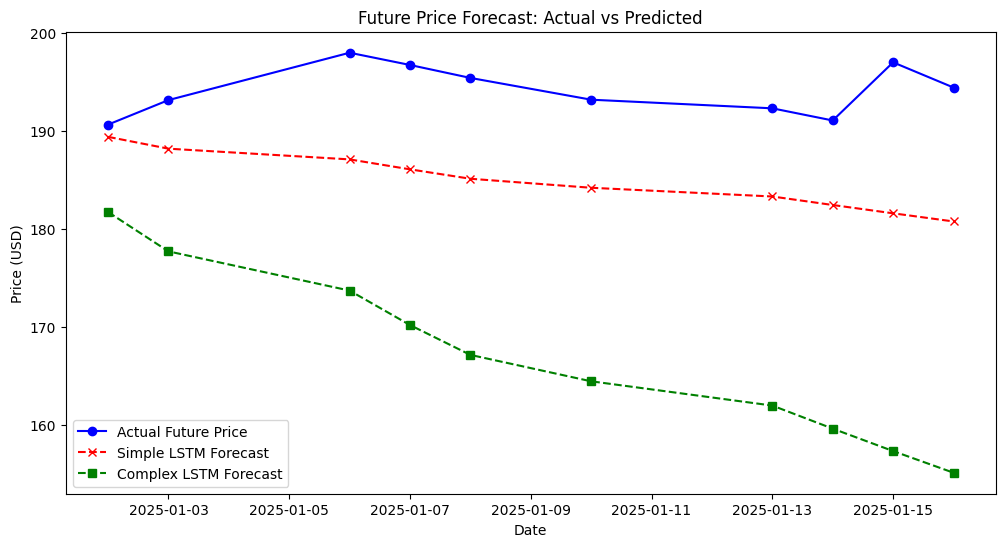

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(future_df['date'], future_df['close'], marker='o', color='blue', label='Actual Future Price')
plt.plot(future_df['date'], predicted_future_simple_actual, marker='x', linestyle='--', color='red', label='Simple LSTM Forecast')
plt.plot(future_df['date'], predicted_future_complex_actual, marker='s', linestyle='--', color='green', label='Complex LSTM Forecast')
plt.title("Future Price Forecast: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## <span style="color: #a9af90">8 | </span><span style="color: #586c5c">Result</span>

**The `Simple` LSTM architect is more appropriate for this forcasting.**

---

# <span style="color: #85937a">The End!</span>
### <span style="color: #586c5c">Mohammad Soroush Esnaashari</span>